<a href="https://colab.research.google.com/github/UTEDungNguyen/AI-Homework04/blob/main/B%C3%A0i_t%E1%BA%ADp_tr%C3%AAn_l%E1%BB%9Bp_AI_(2_3_2023).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 14.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=d4202adb66550f5a87bd3772023de611abb82753bbfe32a999a043430dc3eaed
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
from skfuzzy.control.controlsystem import Antecedent
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axis3d

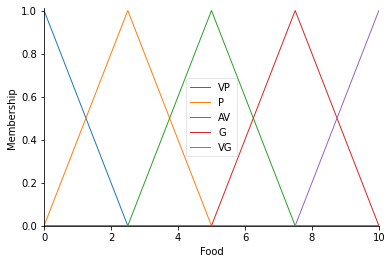

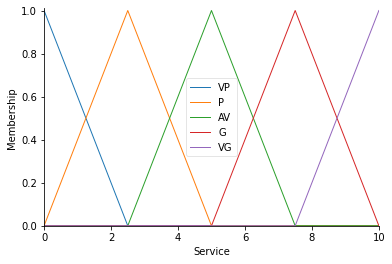

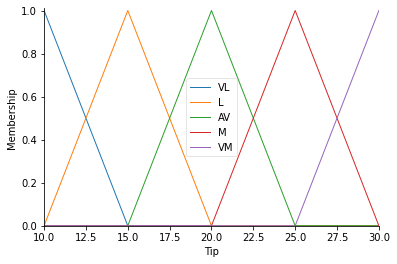

In [17]:
#Miền phổ quát
universe1 = np.linspace(0,10,61) #từ 0-10 chia làm 61 điểm
universe2 = np.linspace(10,30,61)

#input
food    = ctrl.Antecedent(universe1, 'Food')
service = ctrl.Antecedent(universe1, 'Service')
#output
tip     = ctrl.Consequent(universe2, 'Tip')

#name
names_food    = ['VP', 'P', 'AV', 'G', 'VG']
names_service = ['VP', 'P', 'AV', 'G', 'VG']
names_tip     = ['VL', 'L', 'AV', 'M', 'VM']

#.automf : chỉ cho tạo ra các membership function là số LẺ
food.automf(names = names_food)
service.automf(names = names_service)
tip.automf(names = names_tip)

#view
food.view()
service.view()
tip.view()

In [18]:
#rule
rule = []
rule.append(ctrl.Rule(antecedent=(food['VP'] & service['VP'])|(food['P'] & service['VP'])|
(food['VP'] & service['P']), consequent=tip['VL'], label='Rule VL'))

rule.append(ctrl.Rule(antecedent=(food['VP'] & service['AV'])|(food['VP'] & service['G'])|
(food['P'] & service['P'])|(food['P'] & service['AV'])|(food['AV'] & service['VP'])|
(food['AV'] & service['P'])|(food['G'] & service['VP'])|(food['G'] & service['P']), consequent=tip['L'], label='Rule L'))

rule.append(ctrl.Rule(antecedent=(food['VP'] & service['VG'])|(food['P'] & service['G'])|
(food['AV'] & service['AV'])|(food['G'] & service['AV'])|(food['VG'] & service['VP'])|
(food['VG'] & service['P'])|(food['VG'] & service['AV']), consequent=tip['AV'], label='Rule AV'))

rule.append(ctrl.Rule(antecedent=(food['P'] & service['VG'])|(food['AV'] & service['G'])|
(food['G'] & service['G']), consequent=tip['M'], label='Rule M'))

rule.append(ctrl.Rule(antecedent=(food['AV'] & service['VG'])|(food['G'] & service['VG'])|
(food['VG'] & service['G'])|(food['VG'] & service['VG']), consequent=tip['VM'], label='Rule VM'))

In [19]:
from networkx.algorithms.bipartite import projection
#control
system = ctrl.ControlSystem(rule)
simulation = ctrl.ControlSystemSimulation(system,flush_after_run = 61*61+1)

upsampled = np.linspace(0,10,61)
x,y = np.meshgrid(upsampled, upsampled)
z   = np.zeros_like(x)
for i in range(61) :
  for j in range(61) :
    simulation.input['Food'] = x[i,j]
    simulation.input['Service'] = y[i,j]
    simulation.compute()
    z[i,j] = simulation.output['Tip']

<ipython-input-26-0de1fa00d987>:4: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x,y,z, zdir = 'z', offset = 10, cmap = 'viridis', anpha = 0.5)
<ipython-input-26-0de1fa00d987>:5: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x,y,z, zdir = 'x', offset = 11, cmap = 'viridis', anpha = 0.5)
<ipython-input-26-0de1fa00d987>:6: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x,y,z, zdir = 'y', offset = 11, cmap = 'viridis', anpha = 0.5)


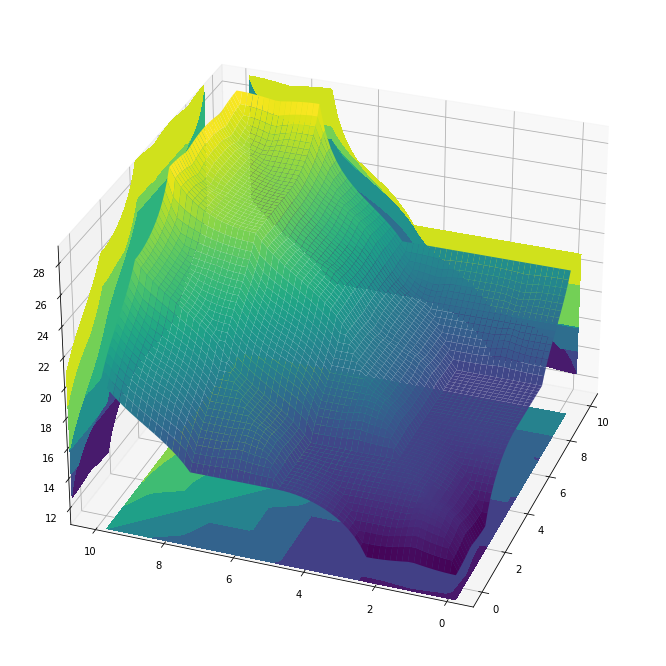

In [26]:
fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(111, projection='3d')
suf = ax.plot_surface(x,y,z, rstride = 1, cstride = 1, cmap = 'viridis', linewidth = 0.4, antialiased = True)
cset = ax.contourf(x,y,z, zdir = 'z', offset = 10, cmap = 'viridis', anpha = 0.5)
cset = ax.contourf(x,y,z, zdir = 'x', offset = 11, cmap = 'viridis', anpha = 0.5)
cset = ax.contourf(x,y,z, zdir = 'y', offset = 11, cmap = 'viridis', anpha = 0.5)
ax.view_init(30,200)